In [1]:
%matplotlib inline

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from knn import KNNClassifier
from perceptron import PerceptronClassifier

In [4]:
def readData(filename):
    with open(filename, "r") as f:
        lines = f.read().strip().split('\n')[1:]
        X, y = list(zip(*([([float(xi) for xi in line.split(',')[:-1]], int(line.split(',')[-1])) for line in lines])))
        return X, y

In [5]:
X, y = readData('data/hw5train.csv')

In [6]:
kc = KNNClassifier(X, y, 10)

In [7]:
tX, ty = readData('data/hw5test.csv')

In [8]:
py = kc.batch_classify(tX)

In [9]:
py

[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [10]:
ty

(-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1)

In [87]:
def plotDecisionBoundary(X, y, classifier):
    h = 0.02
    X, y = np.array(X), np.array(y)
    x1_min, x1_max = X[:,0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))
    Z = classifier.batch_classify(np.c_[xx1.ravel(), xx2.ravel()])
    Z = np.array(Z).reshape(xx1.shape)
    fig = plt.figure()
    plt.contourf(xx1, xx2, Z, cmap=plt.cm.coolwarm, alpha=0.8, antialiased=True)
    plt.scatter(X[:,0], X[:,1], c=-y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

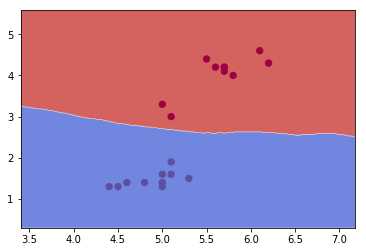

In [97]:
kc = KNNClassifier(X, y, 10)
plotDecisionBoundary(tX, ty, kc)
plt.savefig("../images/knn10.png", dpi=72)

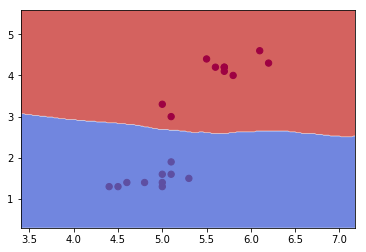

In [96]:
kc = KNNClassifier(X, y, 6)
plotDecisionBoundary(tX, ty, kc)
plt.savefig("../images/knn6.png", dpi=72)

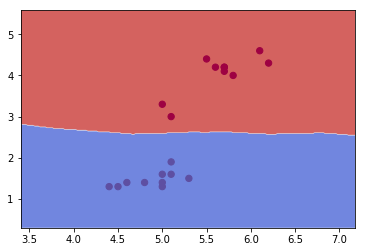

In [95]:
kc = KNNClassifier(X, y, 3)
plotDecisionBoundary(tX, ty, kc)
plt.savefig("../images/knn3.png", dpi=72)

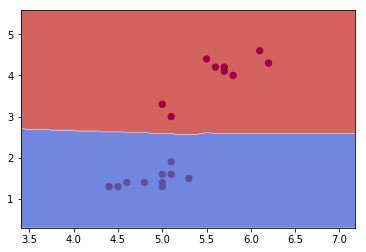

In [94]:
kc = KNNClassifier(X, y, 1)
plotDecisionBoundary(tX, ty, kc)
plt.savefig("../images/knn1.png", dpi=72)

In [27]:
pc = PerceptronClassifier(X, y, 0.1)

In [28]:
pc.fit()

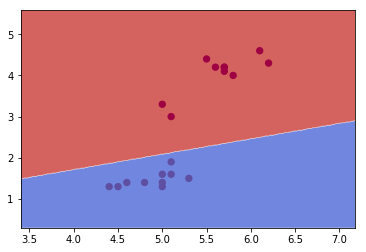

In [93]:
plotDecisionBoundary(tX, ty, pc)
plt.savefig("../images/perceptron.png", dpi=72)

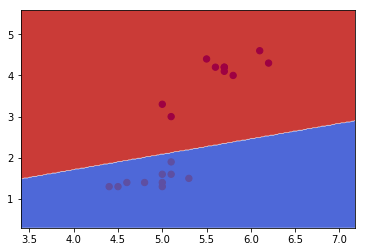

In [86]:
plotDecisionBoundary(tX, ty, pc)

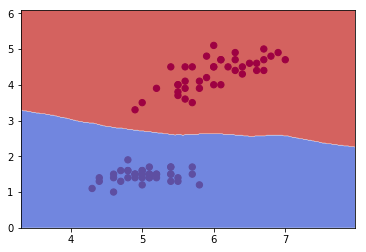

In [101]:
kc = KNNClassifier(X, y, 10)
plotDecisionBoundary(X, y, kc)
plt.savefig("../images/ko.png", dpi=72)

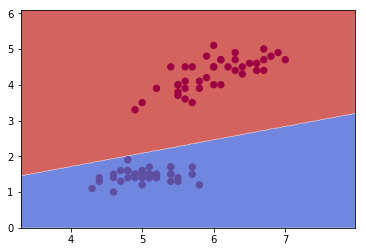

In [102]:
plotDecisionBoundary(X, y, pc)
plt.savefig("../images/po.png", dpi=72)